## 1. Data Cleansing

### A. Handle missing values

In [1]:
import seaborn as sns
import numpy as np
from datetime import datetime

import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

import datetime
import itertools
import pandas as pd

In [2]:
df = pd.read_csv('marketing_campaign.csv', sep=';')
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


In [3]:
df = df.dropna()
df.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

Bisa dilihat dari EDA kalau jumlah missing value hanya 24 tidak sampai 2% dari keseluruhan data, maka dari itu missing value bisa didrop

### B. Handle duplicated data

Tidak ada data duplikat

### D. Feature transformation (1)

Kategorikal  
Mengubah value Education, dan Marital status  
Rubah semua value menjadi huruf kecil agar mudah diolah

In [4]:
df['Marital_Status'] = df['Marital_Status'].str.lower()
df['Education'] = df['Education'].str.lower()
print(df['Marital_Status'].value_counts())
print(df['Education'].value_counts())

married     857
together    573
single      471
divorced    232
widow        76
alone         3
absurd        2
yolo          2
Name: Marital_Status, dtype: int64
graduation    1116
phd            481
master         365
2n cycle       200
basic           54
Name: Education, dtype: int64


C:\Users\Morenna\AppData\Local\Temp\ipykernel_17204\3295372188.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Marital_Status'] = df['Marital_Status'].str.lower()
C:\Users\Morenna\AppData\Local\Temp\ipykernel_17204\3295372188.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Education'] = df['Education'].str.lower()


Marital status disederhanakan menjadi dua kategori berdasarkan customer tinggal sendiri atau dengan orang lain

In [5]:
single = ['divorced','widow','alone']
together = ['married']

df['Marital_Status'] = df['Marital_Status'].apply(lambda x: 'single' if x in single else x)
df['Marital_Status'] = df['Marital_Status'].apply(lambda x: 'together' if x in together else x)

df['Marital_Status'].value_counts()

C:\Users\Morenna\AppData\Local\Temp\ipykernel_17204\693423501.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Marital_Status'] = df['Marital_Status'].apply(lambda x: 'single' if x in single else x)
C:\Users\Morenna\AppData\Local\Temp\ipykernel_17204\693423501.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Marital_Status'] = df['Marital_Status'].apply(lambda x: 'together' if x in together else x)


together    1430
single       782
absurd         2
yolo           2
Name: Marital_Status, dtype: int64

Kalau kita lihat data diatas feature marital status yang memiliki value absurd dan yolo hanya 4 row dan tidak terlalu mempengaruhi data maka dari itu row akan di drop

In [6]:
df = df[df['Marital_Status'].isin(['together', 'single'])]

In [7]:
df['Education'] = df['Education'].replace('2n cycle', 'master')
df['Education'].value_counts()

graduation    1115
master         564
phd            479
basic           54
Name: Education, dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2212 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2212 non-null   int64  
 1   Year_Birth           2212 non-null   int64  
 2   Education            2212 non-null   object 
 3   Marital_Status       2212 non-null   object 
 4   Income               2212 non-null   float64
 5   Kidhome              2212 non-null   int64  
 6   Teenhome             2212 non-null   int64  
 7   Dt_Customer          2212 non-null   object 
 8   Recency              2212 non-null   int64  
 9   MntWines             2212 non-null   int64  
 10  MntFruits            2212 non-null   int64  
 11  MntMeatProducts      2212 non-null   int64  
 12  MntFishProducts      2212 non-null   int64  
 13  MntSweetProducts     2212 non-null   int64  
 14  MntGoldProds         2212 non-null   int64  
 15  NumDealsPurchases    2212 non-null   i

### E. Feature encoding

In [9]:
mapping_education = {'basic':0,
                     'graduation':1,
                     'master':2,
                     'phd':3}
df['Education'] = df['Education'].map(mapping_education)

In [10]:
df['Education'].value_counts()

1    1115
2     564
3     479
0      54
Name: Education, dtype: int64

In [11]:
dummy_marital = pd.get_dummies(df['Marital_Status'], prefix='Marital')

In [12]:
df = pd.concat([df, dummy_marital], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2212 entries, 0 to 2239
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2212 non-null   int64  
 1   Year_Birth           2212 non-null   int64  
 2   Education            2212 non-null   int64  
 3   Marital_Status       2212 non-null   object 
 4   Income               2212 non-null   float64
 5   Kidhome              2212 non-null   int64  
 6   Teenhome             2212 non-null   int64  
 7   Dt_Customer          2212 non-null   object 
 8   Recency              2212 non-null   int64  
 9   MntWines             2212 non-null   int64  
 10  MntFruits            2212 non-null   int64  
 11  MntMeatProducts      2212 non-null   int64  
 12  MntFishProducts      2212 non-null   int64  
 13  MntSweetProducts     2212 non-null   int64  
 14  MntGoldProds         2212 non-null   int64  
 15  NumDealsPurchases    2212 non-null   i

Split data train dan data test 

In [13]:
feature = ['Year_Birth', 'Education','Income', 'Kidhome', 'Teenhome',
    'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
    'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
    'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
    'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
    'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Marital_single', 'Marital_together']
target = ['Response']

x = df[feature]
y = df[target]

X_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [14]:
df_train  = pd.concat([X_train, y_train], axis=1)
df_train.shape[0]

1548

### C. Handle outliers

In [15]:
def handle_outliers_with_iqr(dataframe, columns):
    df_copy = dataframe.copy()

    for column in columns:
        # Menghitung Q1 dan Q3
        q1 = df_copy[column].quantile(0.25)
        q3 = df_copy[column].quantile(0.75)

        # Menghitung IQR (Interquartile Range)
        iqr = q3 - q1

        # Menentukan batas bawah dan batas atas untuk outliers
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr

        # Hapus baris dengan nilai di luar batas bawah atau batas atas
        df_copy = df_copy[(df_copy[column] >= lower_bound) & (df_copy[column] <= upper_bound)]

    return df_copy

In [16]:
def handle_outliers_with_z_score(dataframe, columns, threshold=3):
    df_copy = dataframe.copy()

    for column in columns:
        # Calculate Z-Score for each value in the column
        z_scores = (df_copy[column] - df_copy[column].mean()) / df_copy[column].std()

        # Identify and remove rows with Z-Score beyond the specified threshold
        df_copy = df_copy[abs(z_scores) <= threshold]

    return df_copy

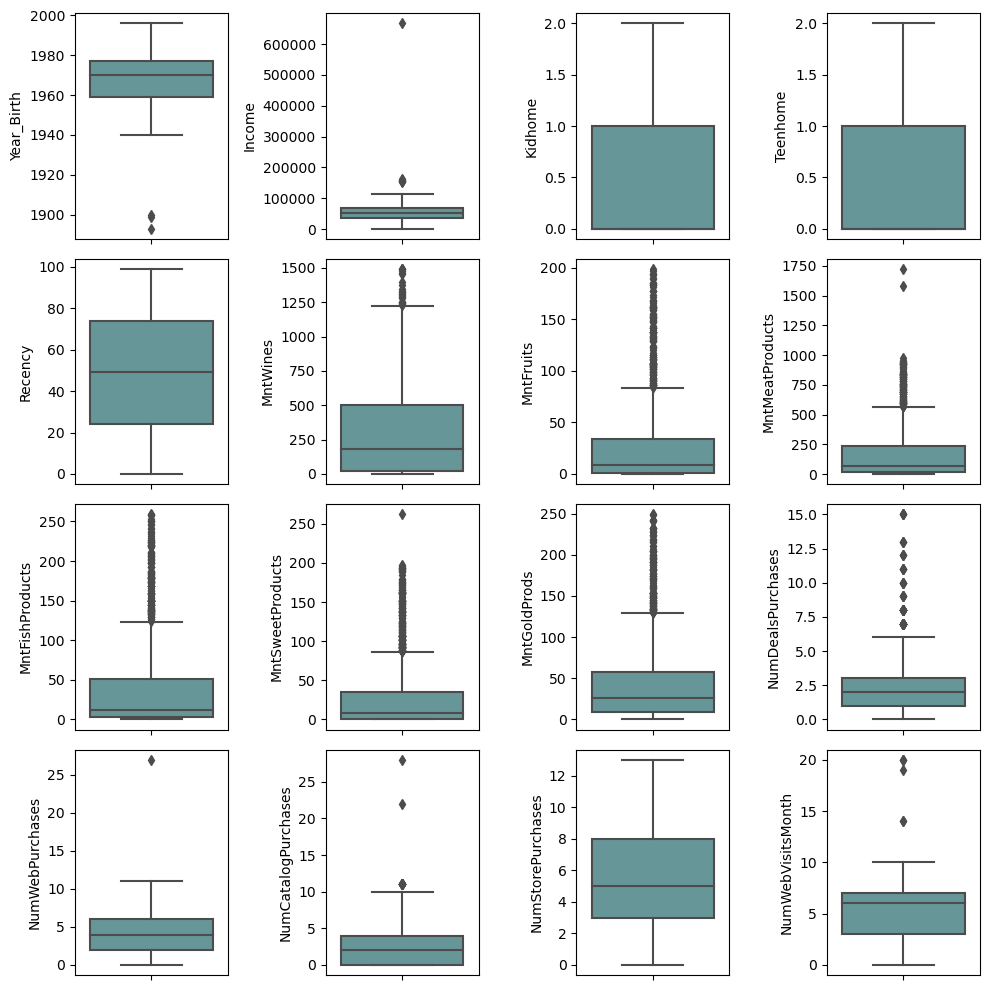

In [17]:
nums =['Year_Birth','Income', 'Kidhome', 'Teenhome',
       'Recency','MntWines','MntFruits','MntMeatProducts',
       'MntFishProducts','MntSweetProducts','MntGoldProds',
       'NumDealsPurchases','NumWebPurchases','NumCatalogPurchases',
       'NumStorePurchases','NumWebVisitsMonth']

plt.figure (figsize=(10,10))
for i in range (0, len(nums)):
  plt.subplot (4,4,i+1)
  sns.boxplot(y=df_train[nums[i]],color = 'cadetblue',orient ='v')
  plt.tight_layout()

In [18]:
df_train.shape[0]

1548

In [19]:
filter_list = ['Year_Birth','Income','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumWebVisitsMonth']
# df_train = handle_outliers_with_z_score(df_train, filter_list, 3)
df_train = handle_outliers_with_z_score(df_train, filter_list, 3.39)

In [20]:
df_train.shape[0]

1392

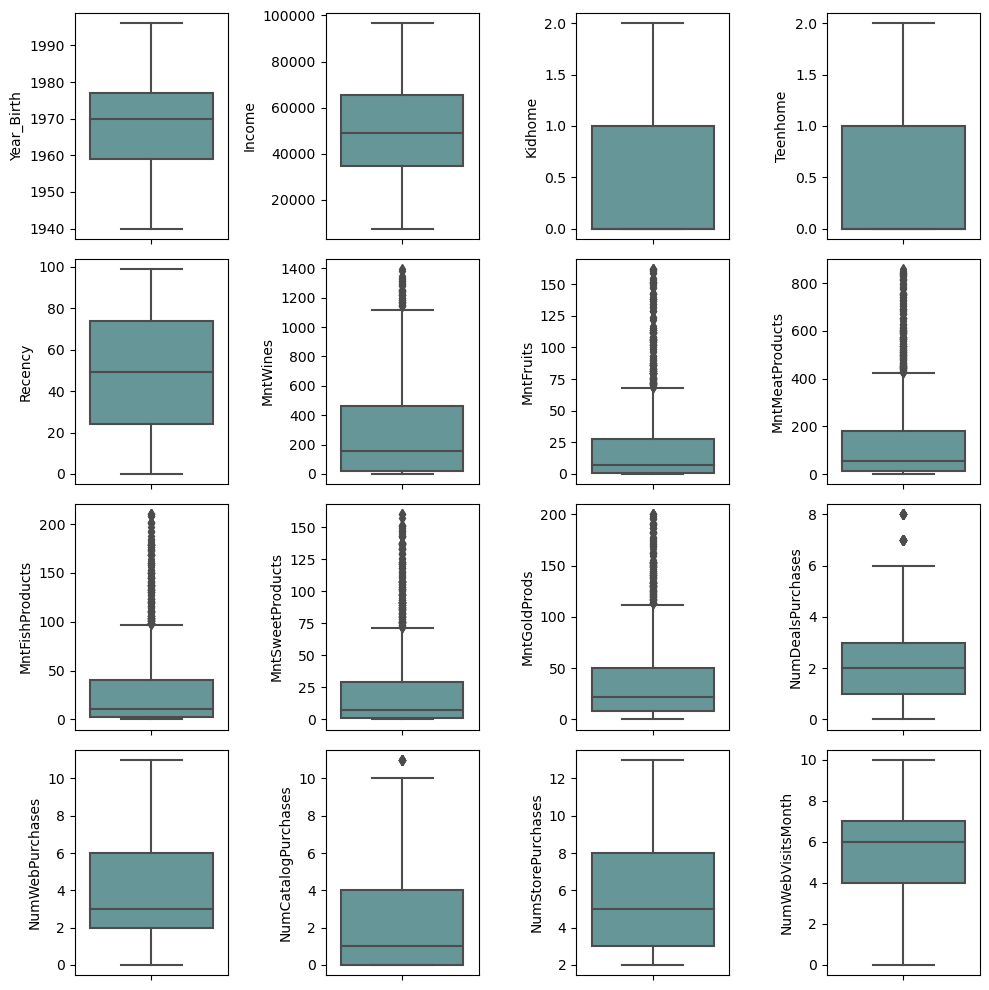

In [21]:
plt.figure (figsize=(10,10))
for i in range (0, len(nums)):
  plt.subplot (4,4,i+1)
  sns.boxplot(y=df_train[nums[i]],color = 'cadetblue',orient ='v')
  plt.tight_layout()

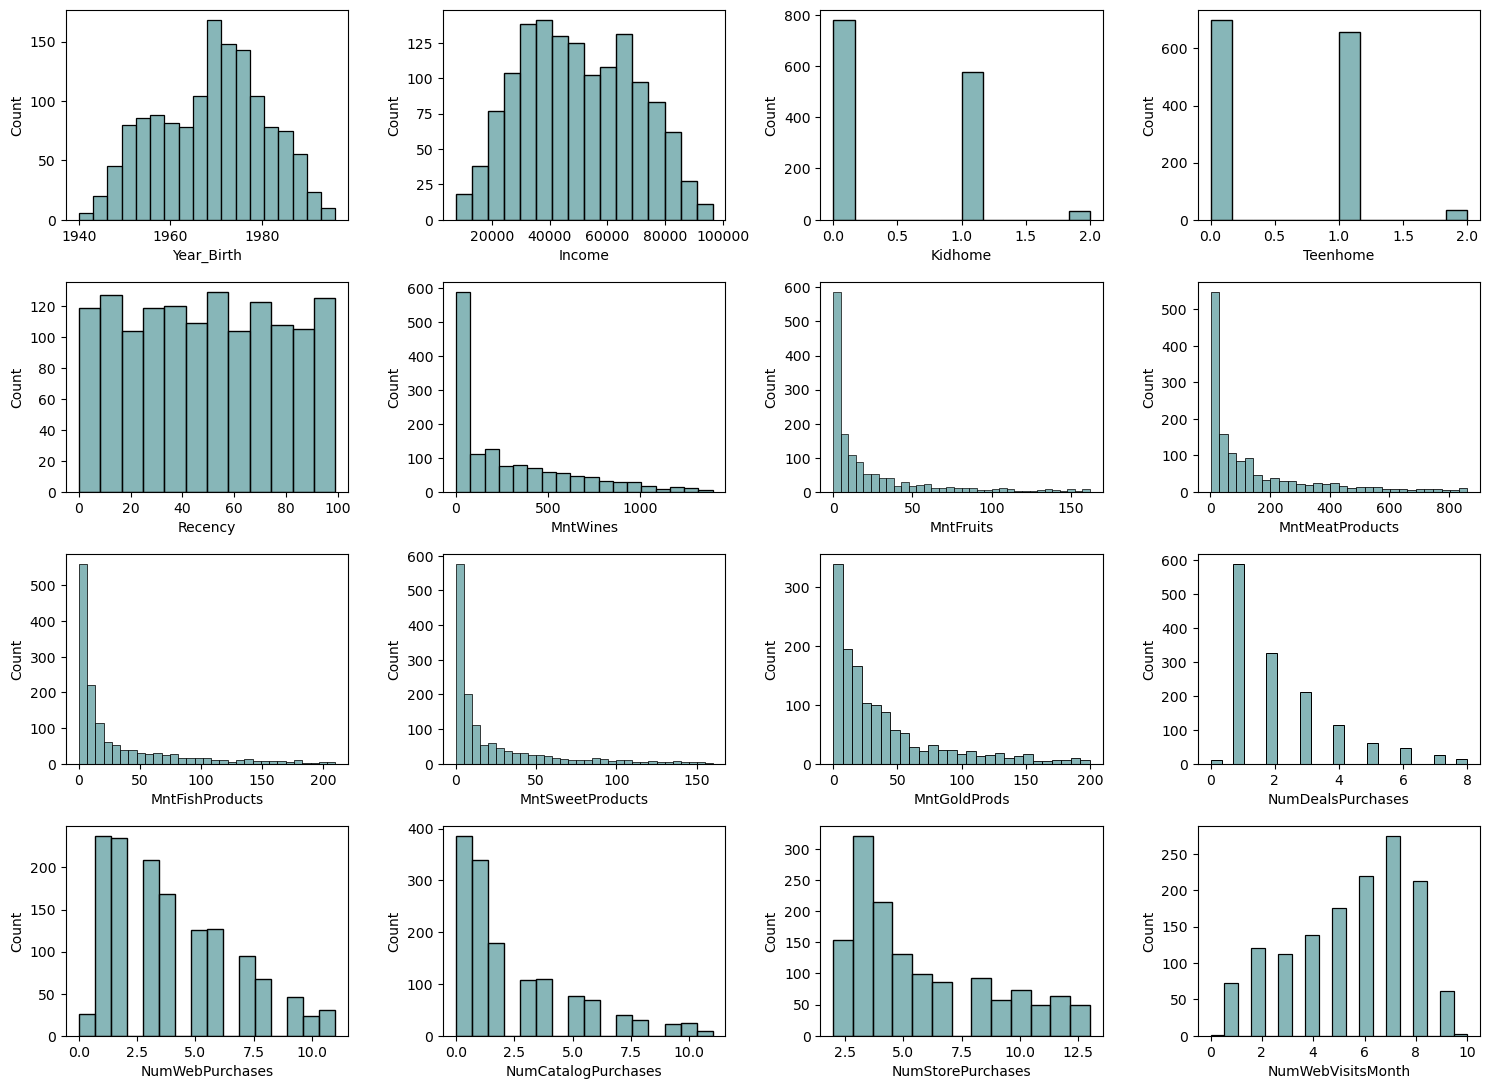

In [22]:
plt.figure(figsize=(15,11))
for i in range (0,len(nums)):
  plt.subplot (4,4,i+1)
  sns.histplot(df_train[nums[i]],color ='cadetblue')
plt.tight_layout()

### 2 B. Feature extraction (membuat feature baru dari feature yang sudah ada)

In [26]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1392 entries, 597 to 873
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           1392 non-null   int64  
 1   Education            1392 non-null   int64  
 2   Income               1392 non-null   float64
 3   Kidhome              1392 non-null   int64  
 4   Teenhome             1392 non-null   int64  
 5   Recency              1392 non-null   int64  
 6   MntWines             1392 non-null   int64  
 7   MntFruits            1392 non-null   int64  
 8   MntMeatProducts      1392 non-null   int64  
 9   MntFishProducts      1392 non-null   int64  
 10  MntSweetProducts     1392 non-null   int64  
 11  MntGoldProds         1392 non-null   int64  
 12  NumDealsPurchases    1392 non-null   int64  
 13  NumWebPurchases      1392 non-null   int64  
 14  NumCatalogPurchases  1392 non-null   int64  
 15  NumStorePurchases    1392 non-null   

In [27]:
# Membuat feature age dari Year_birth

current_year = datetime.datetime.now().year
df_train['Age'] = current_year - df_train['Year_Birth']
x_test['Age'] = current_year - df_train['Year_Birth']

In [28]:
# Membuat feature jumlah kategori yang pernah dibeli costumer
products = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
df_train['Varian_products'] = (df_train[products] > 0).sum(axis=1)
df_train['Total_products'] = df_train[products].sum(axis=1)
df_train[products+['Varian_products','Total_products']]

x_test['Varian_products'] = (df_train[products] > 0).sum(axis=1)
x_test['Total_products'] = df_train[products].sum(axis=1)
x_test[products+['Varian_products','Total_products']]

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Varian_products,Total_products
868,121,62,90,68,20,125,NaN,NaN
1316,171,45,73,59,10,90,NaN,NaN
1492,1259,172,815,97,148,33,NaN,NaN
443,10,4,14,4,4,1,NaN,NaN
1281,620,54,239,99,98,119,NaN,NaN
...,...,...,...,...,...,...,...,...
1189,27,2,7,0,2,13,NaN,NaN
832,421,5,90,0,16,10,NaN,NaN
1207,1,12,9,0,14,7,NaN,NaN
356,78,0,11,0,0,10,NaN,NaN


In [29]:
# Membuat feature jumlah campaign diterima

df_train['TotalAccepted'] = df_train[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].sum(axis=1)
x_test['TotalAccepted'] = df_train[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].sum(axis=1)

In [30]:
df_train['TotalPurchases'] = df_train[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum(axis=1)
df_train[df_train['TotalPurchases'] == 0]

,Year_Birth,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp2,Complain,Marital_single,Marital_together,Response,Age,Varian_products,Total_products,TotalAccepted,TotalPurchases


### 1.D. Feature transformation (2)

#### Numerik

In [31]:
distribusi = ['Income','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth','Age','Varian_products','Total_products','TotalAccepted','TotalPurchases']

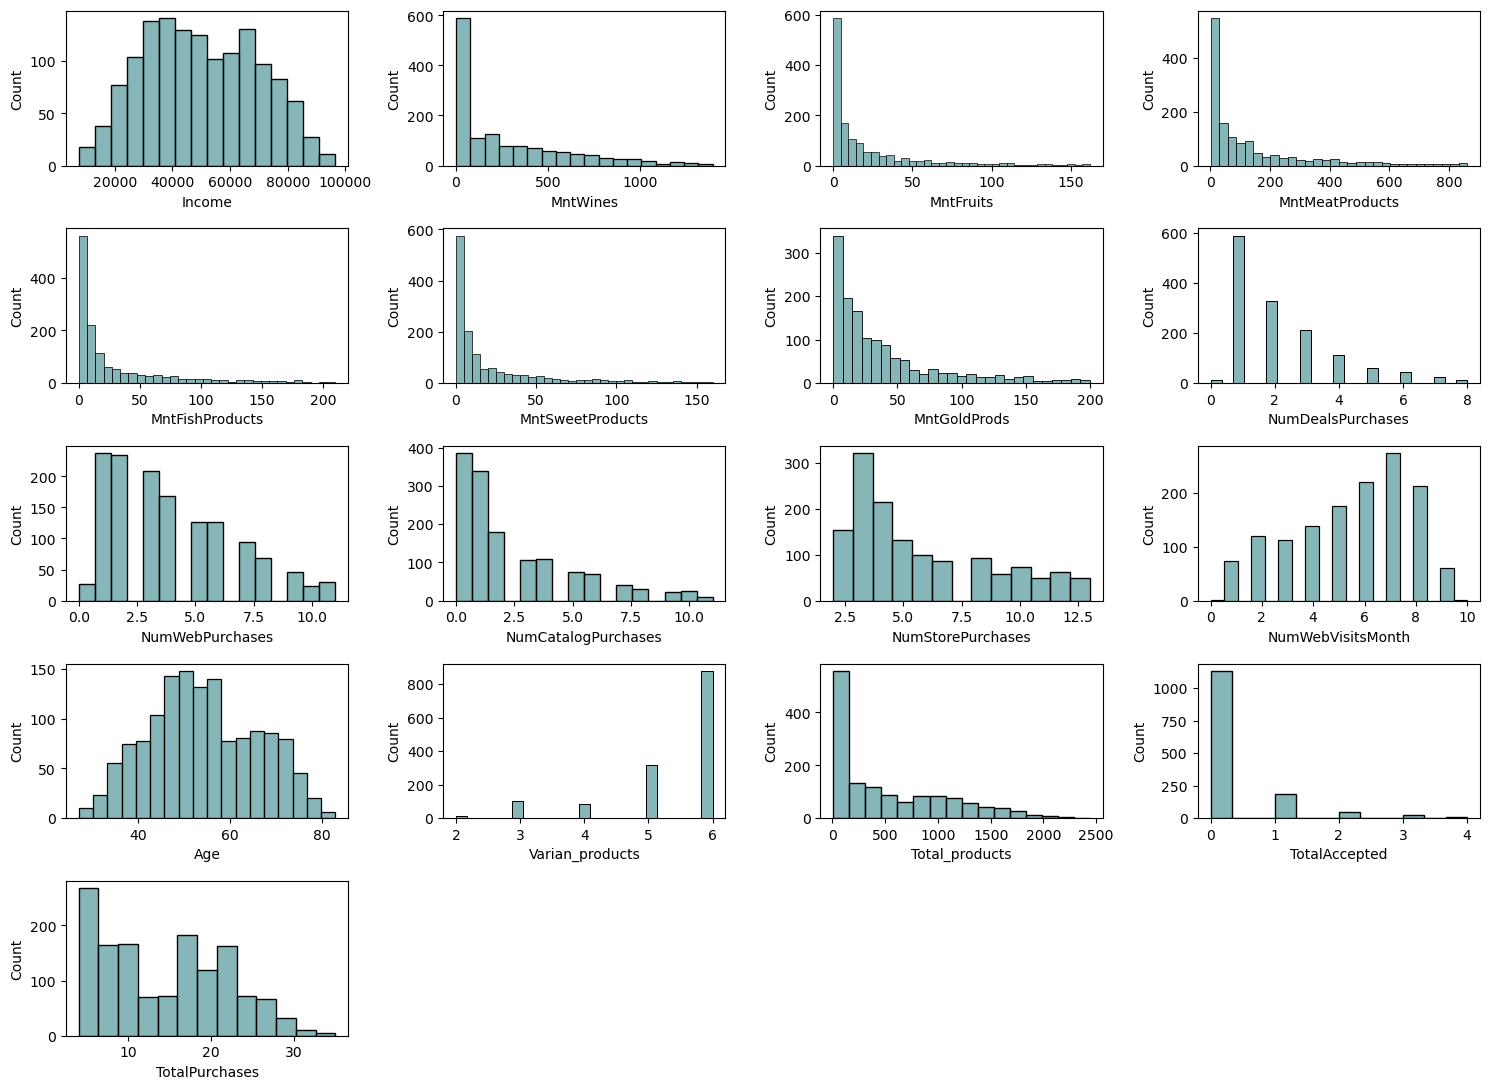

In [32]:
plt.figure(figsize=(15,11))
for i in range (0,len(distribusi)):
  plt.subplot (5,4,i+1)
  sns.histplot(df_train[distribusi[i]],color ='cadetblue')
plt.tight_layout()

In [33]:
df_log = np.log(df_train[distribusi])

C:\Users\Morenna\anaconda3\Lib\site-packages\pandas\core\internals\blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


In [34]:
df_log1p = np.log1p(df_train[distribusi])

In [36]:
# df_train[distribusi] = np.sqrt(df_train[distribusi])
# df_train[distribusi] = np.square(df_train[distribusi])

In [37]:
from sklearn.preprocessing import PowerTransformer
df_yeo = pd.DataFrame()
transformer = PowerTransformer(method='yeo-johnson')
df_yeo[distribusi] = transformer.fit_transform(df_train[distribusi])

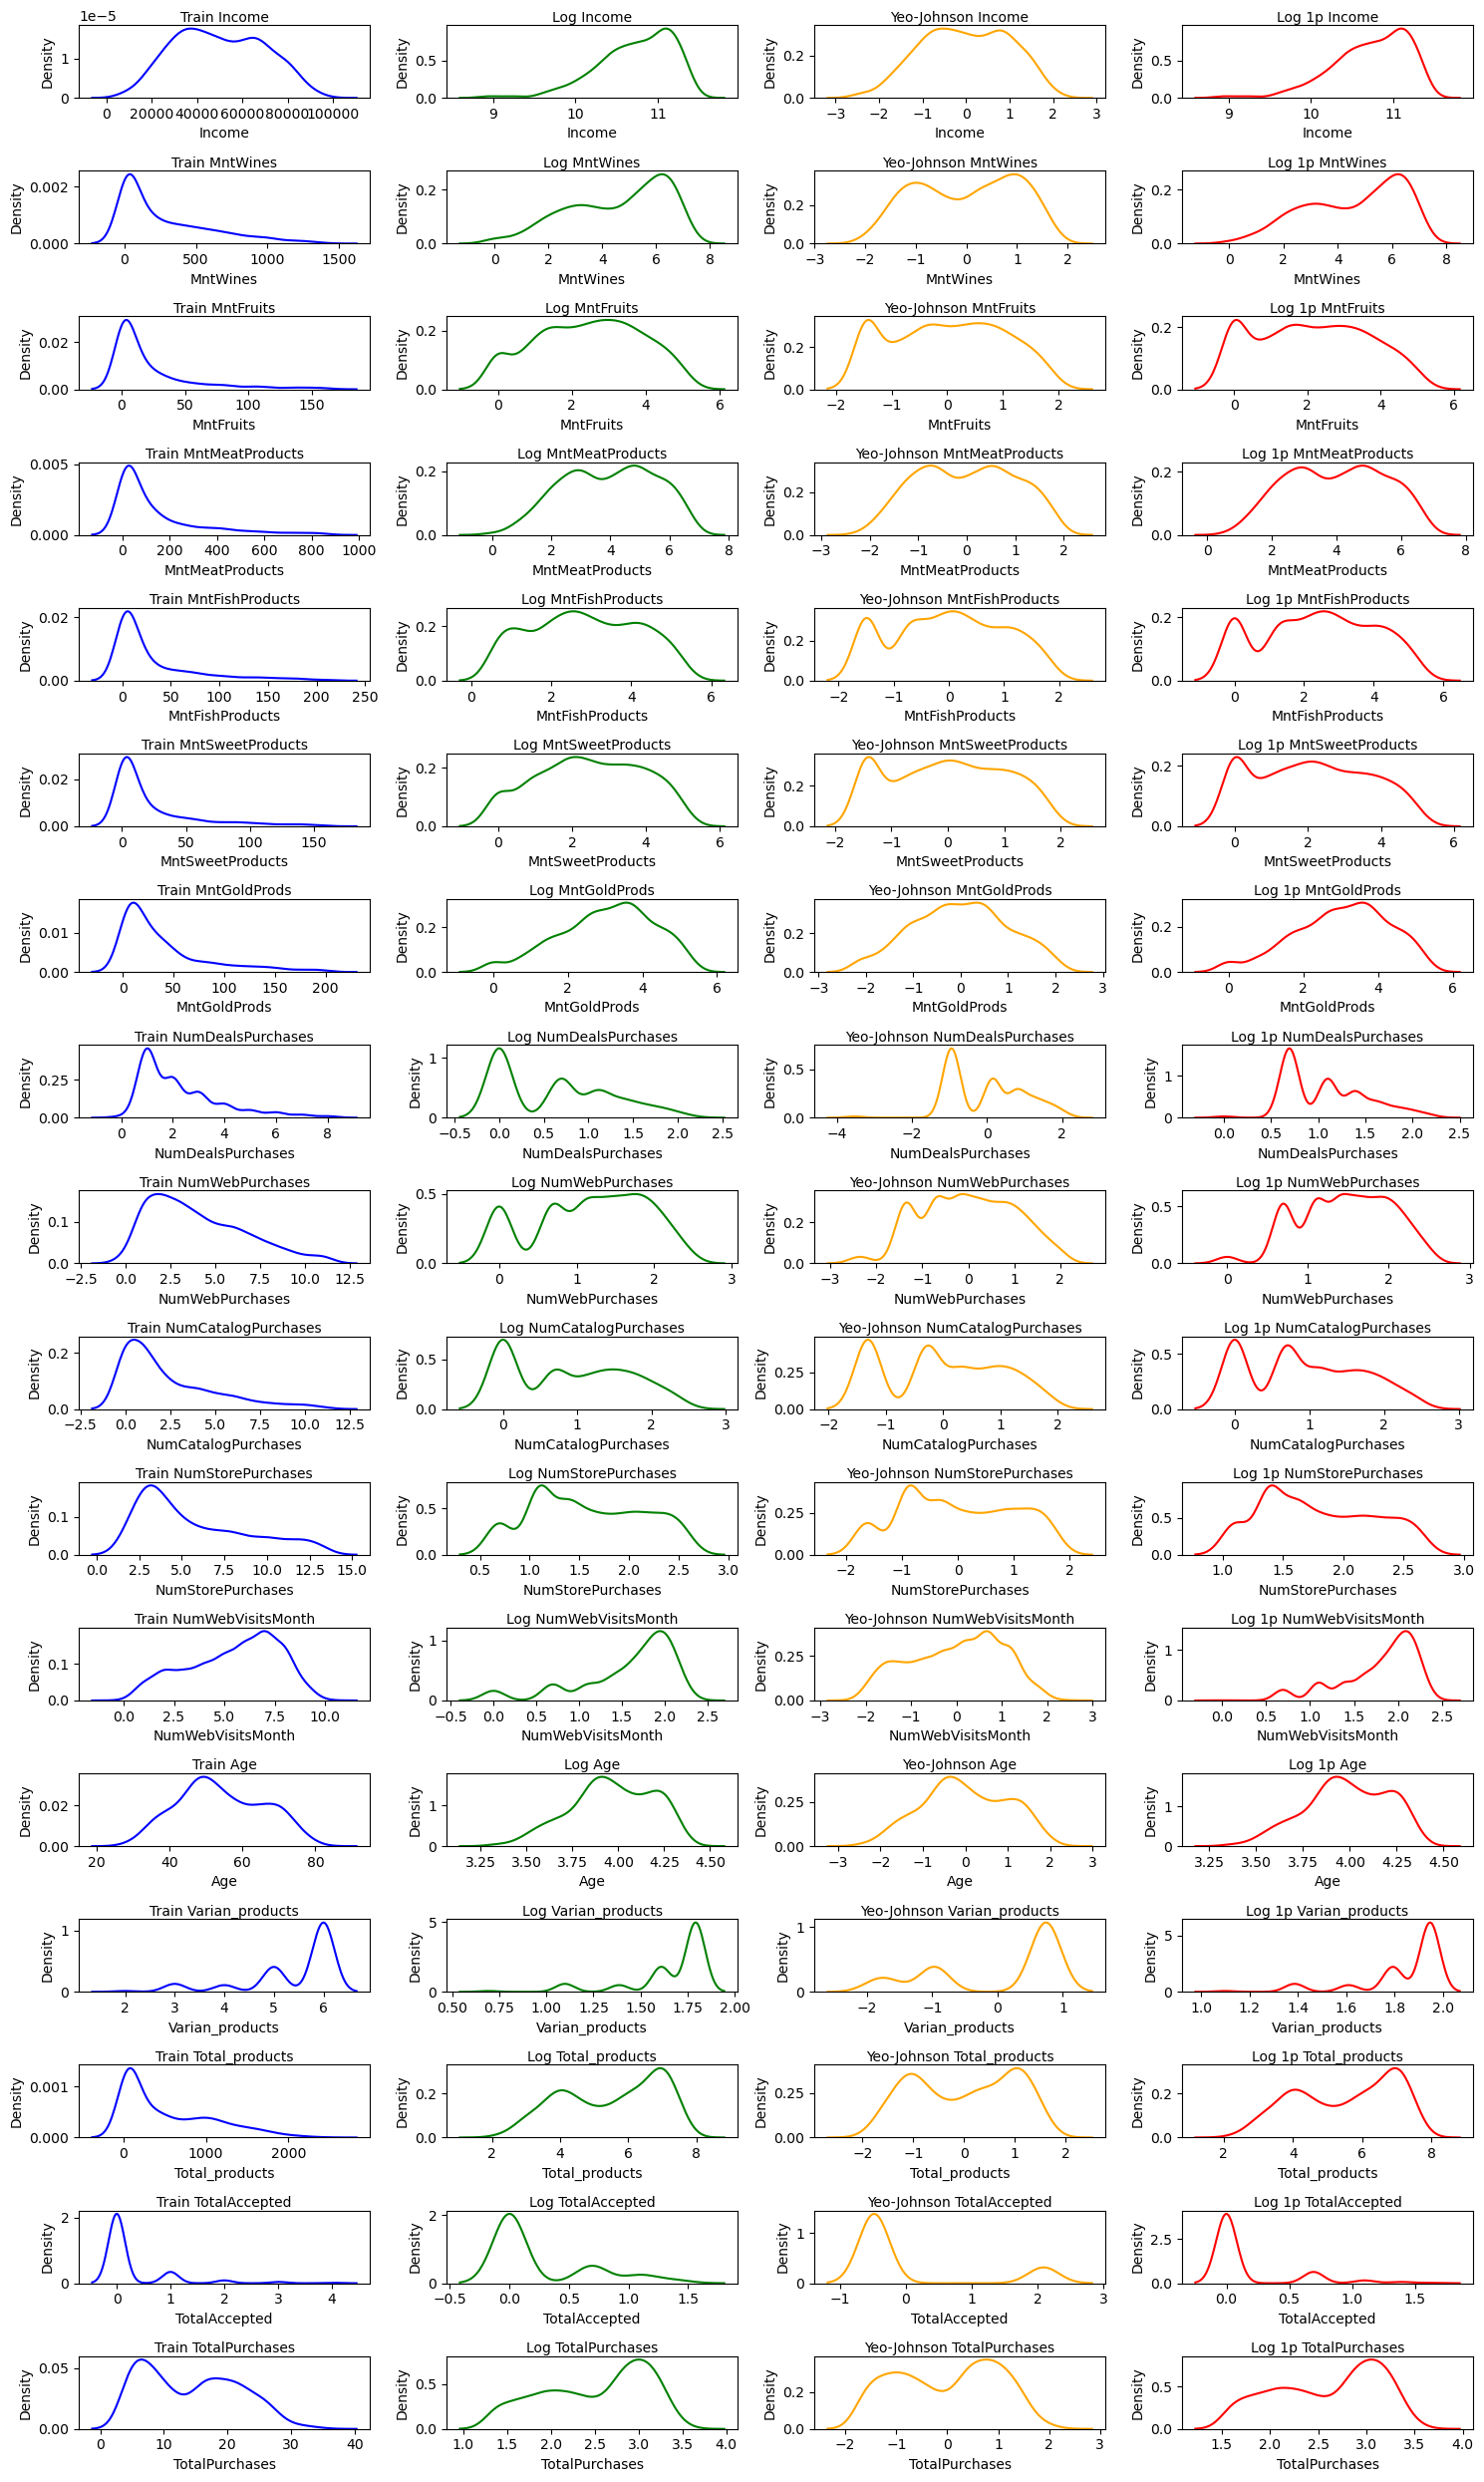

In [38]:
fig, ax = plt.subplots(len(distribusi),4,figsize=(15,25))

colors = ['blue', 'green', 'orange', 'red']


for i in range(0,len(distribusi)):
    kde1 = sns.kdeplot(df_train[distribusi[i]], ax=ax[i][0],color=colors[0])
    kde2 = sns.kdeplot(df_log[distribusi[i]], ax=ax[i][1],color=colors[1])
    kde3 = sns.kdeplot(df_yeo[distribusi[i]], ax=ax[i][2],color=colors[2])
    kde4 = sns.kdeplot(df_log1p[distribusi[i]], ax=ax[i][3],color=colors[3])


    ax[i][0].text(0.5, 1.05, f'Train {distribusi[i]}', transform=ax[i][0].transAxes, ha='center')
    ax[i][1].text(0.5, 1.05, f'Log {distribusi[i]}', transform=ax[i][1].transAxes, ha='center')
    ax[i][2].text(0.5, 1.05, f'Yeo-Johnson {distribusi[i]}', transform=ax[i][2].transAxes, ha='center')
    ax[i][3].text(0.5, 1.05, f'Log 1p {distribusi[i]}', transform=ax[i][3].transAxes, ha='center')


    plt.tight_layout()

In [39]:
# yeo_list = ['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth','Age','Varian_products','Total_products','TotalAccepted','TotalPurchases']

df_train[distribusi] = df_log1p[distribusi]
# df_train[distribusi] = df_yeo[distribusi]

In [40]:
# yeo_list = ['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth','Age','Varian_products','Total_products','TotalAccepted','TotalPurchases']

# df_train[distribusi] = df_log[distribusi]
# df_train[yeo_list] = df_yeo[yeo_list]

In [41]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df_train[distribusi] = scaler.fit_transform(df_train[distribusi])

## 2. Feature Engineering

### A. Feature selection (membuang feature yang kurang relevan atau redundan)

In [45]:
df_train.sample(5)

,Year_Birth,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp2,Complain,Marital_single,Marital_together,Response,Age,Varian_products,Total_products,TotalAccepted,TotalPurchases
1338,1952,1,0.655612,0,1,23,0.364406,0.382019,0.228575,0.000000,...,0,0,1,0,0,0.859686,0.818068,0.231893,0.0,0.092358
621,1971,1,0.563273,0,0,92,0.399108,0.431357,0.308626,0.464307,...,0,0,1,0,0,0.580812,1.000000,0.422479,0.0,0.170445
2126,1966,1,0.822125,0,1,34,0.811609,0.000000,0.657711,0.559756,...,0,0,0,1,0,0.662871,0.818068,0.752211,0.0,0.676265
1380,1955,2,0.713138,0,1,56,0.630254,0.531642,0.573993,0.205277,...,0,0,1,0,0,0.820947,1.000000,0.572904,0.0,0.399405
316,1972,1,0.658262,1,1,59,0.525631,0.315963,0.395370,0.363595,...,0,0,0,1,0,0.563474,0.818068,0.435040,0.0,0.297752


In [47]:
from sklearn.feature_selection import SelectKBest, f_classif

y_train = df_train['Response']
X_train = df_train.drop('Response', axis=1)

nums = [
    'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
    'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
    'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
    'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4',
    'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain',
    'Age', 'Varian_products', 'Total_products', 'TotalAccepted',
    'TotalPurchases']

k_best = SelectKBest(score_func=f_classif, k='all')

X_train_k_best = k_best.fit_transform(X_train[nums], y_train)

# Mendapatkan skor dan nama fitur terbaik
feature_scores = pd.DataFrame({'Feature': X_train[nums].columns, 'Score': k_best.scores_})
feature_scores = feature_scores.sort_values(by='Score', ascending=False)

# Menampilkan skor fitur
print(feature_scores)

                Feature       Score
24        TotalAccepted  221.903526
18         AcceptedCmp1  130.648565
17         AcceptedCmp5   98.394283
15         AcceptedCmp3   74.621768
12  NumCatalogPurchases   72.462120
6       MntMeatProducts   50.796009
3               Recency   49.372085
9          MntGoldProds   48.349267
23       Total_products   46.898832
16         AcceptedCmp4   44.165055
19         AcceptedCmp2   43.451439
11      NumWebPurchases   35.035350
25       TotalPurchases   30.452916
2              Teenhome   28.825366
4              MntWines   26.369837
8      MntSweetProducts   22.809607
5             MntFruits   16.835848
0                Income   12.093496
7       MntFishProducts   11.181152
1               Kidhome    5.314368
22      Varian_products    4.595611
20             Complain    0.341484
14    NumWebVisitsMonth    0.238056
13    NumStorePurchases    0.100034
10    NumDealsPurchases    0.004716
21                  Age    0.000710


In [48]:
cats = ['Education','Marital_single','Marital_together']

from sklearn.feature_selection import chi2
k_best = SelectKBest(score_func=chi2, k='all')  # 'all' untuk mendapatkan semua fitur, atau Anda dapat tentukan jumlah fitur (k) yang diinginkan

# Melakukan fit pada data training dan transformasi pada data training
X_train_k_best = k_best.fit_transform(X_train[cats], y_train)


# Mendapatkan skor dan nama fitur terbaik
feature_scores = pd.DataFrame({'Feature': X_train[cats].columns, 'Score': k_best.scores_})
feature_scores = feature_scores.sort_values(by='Score', ascending=False)

# Menampilkan skor fitur
print(feature_scores)

            Feature      Score
1    Marital_single  13.398273
0         Education   7.692353
2  Marital_together   7.164457


### C. Tuliskan minimal 4 feature tambahan (Hanya perlu dijawab tidak perlu di implementasi)

#### 1. TotalAmountSpent  
#### 2. PurchasesPerVisit  
#### 3. Average Purchase Price    
#### 4. Customer Segmentation

# 1.F Handle Class Imbalance

In [55]:
import pandas as pd
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [59]:
df['Marital_Status'] = pd.to_numeric(df['Marital_Status'], errors='coerce')

In [61]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

In [62]:
X = df.drop('Income', axis=1)
y = df['']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)


clf = RandomForestClassifier(random_state=42)
clf.fit(X_resampled, y_resampled)

y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

TypeError: The DType <class 'numpy.dtype[datetime64]'> could not be promoted by <class 'numpy.dtype[float64]'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtype[int64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[datetime64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>)

# GIT

https://github.com/morrencindo/final_project.git